#  Dataset import

In [17]:
!pip install emnist
from emnist import list_datasets
from emnist import extract_training_samples
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [0]:
from emnist import extract_training_samples
Xtrain, ytrain = extract_training_samples('letters')
ytrain=ytrain-1

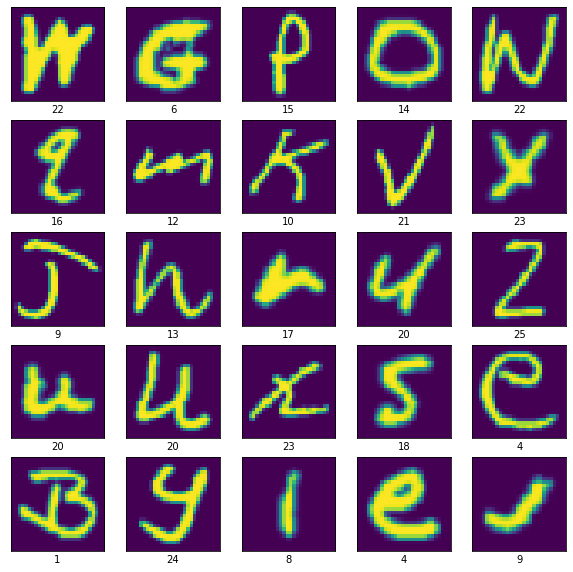

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    #axi.imshow(images[i],cmap='Greys')
    axi.imshow(Xtrain[i])
    axi.set(xticks=[], yticks=[],xlabel=ytrain[i])

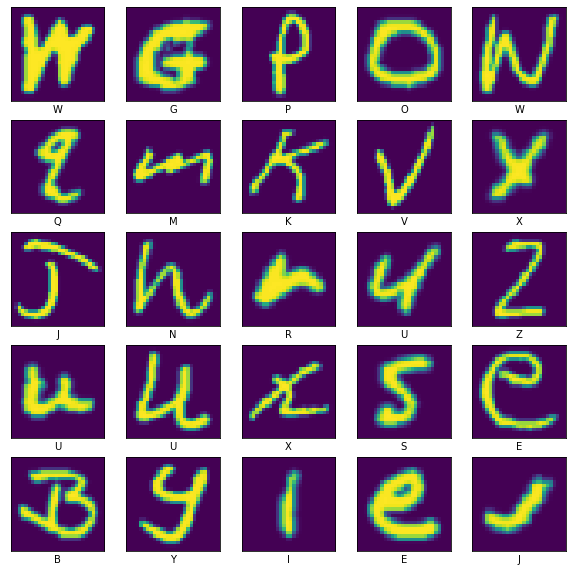

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtrain[i])
    axi.set(xticks=[], yticks=[],xlabel=mon_dictionnaire[ytrain[i]])

# Split test-train

In [21]:
len(Xtrain)-len(Xtrain)*0.2

99840.0

In [0]:
from emnist import extract_test_samples
Xtest, ytest = extract_test_samples('letters')
ytest=ytest-1

# Data prepocessing before traning

In [0]:
input_shape = (28, 28, 1)## to fit keras model
Xtrain = Xtrain.reshape(len(Xtrain), 28, 28, 1)
Xtest = Xtest.reshape(len(Xtest), 28, 28, 1)
# Normalize pixels
Xtrain= Xtrain/255
Xtest = Xtest/255

In [0]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain, 52)
ytest =to_categorical(ytest, 52)

In [25]:
ytest.shape

(20800, 52)

In [26]:
Xtrain.shape

(124800, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,LSTM,BatchNormalization
from keras.losses import categorical_crossentropy
from keras import optimizers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(52, activation='softmax'))

#  Training and saving

In [28]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(Xtrain, ytrain, epochs=10,batch_size=400)
score = model.evaluate(Xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Saving model...")
model.save("letters_model.h5")


Epoch 1/10
124800/124800 [==============================] - 14s 109us/step - loss: 0.7604 - accuracy: 0.7735
Epoch 2/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.3332 - accuracy: 0.8920
Epoch 3/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.2713 - accuracy: 0.9105
Epoch 4/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.2414 - accuracy: 0.9198
Epoch 5/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.2176 - accuracy: 0.9269
Epoch 6/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.2024 - accuracy: 0.9308
Epoch 7/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.1893 - accuracy: 0.9351
Epoch 8/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.1828 - accuracy: 0.9366
Epoch 9/10
124800/124800 [==============================] - 13s 102us/step - loss: 0.1713 - accuracy: 0.9391
Epoch 10/10
124800/